# Importacion de librerias;

In [161]:
import pandas as pd
import numpy as np

#bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler # para convertir valores cat a int a traves de un arreglo
from sklearn.preprocessing import FunctionTransformer # para trasnformar distribuciones asimetricas a simetricas y vice
from sklearn.model_selection import train_test_split # para separar los datos en; datos test y datos train
from sklearn.linear_model import LinearRegression # para importar la regresion lineal
from sklearn.metrics import r2_score # para ver las metricas de modelos de regresion, especificamente R-Cuadrado
from sklearn.metrics import mean_squared_error # para ver las metricias de modelos de regresion, especificamente MSE
from sklearn.tree import DecisionTreeRegressor # para importar el arbol de decision de regresion
from sklearn.ensemble import RandomForestRegressor # para importar el bosque aleatorio de regresion o forest random

from yellowbrick.regressor import PredictionError # para ver las metricias de arbol de decision de regresion, especifiamente la prediccion de error (Prediccion_Error)

from sklearn.model_selection import KFold # para inicializar k de cross validation
from sklearn.model_selection import cross_val_score # para la tecnica de optimizacion cross validation
from sklearn.model_selection import RandomizedSearchCV # para la tecnica de optimizacion de Randomized Parameter Optimization 

# Lectura del JSON;

In [80]:
datos = pd.read_json('inmuebles.json')
datos

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


# Tratamiento de los datos;

### Exploro las columnas (features)
La columna "ident" tiene 2 columnas dentro suyo, mi objetivo sera extraer esas 2 columnas

La columna "listing" tambien tiene columnas dentro suyo, pero dentro esas columnas se encuentran mas columnas. E= La columna "listing" tiene dentro suyo las columnas "types", "adress", "location" "caracteristicas". Pero por ejemplo, dentro de "types" existen 2 columnas mas "unit" y "usage". Por lo que se tiene 2 columnas ocultas, para poder extraer esas columnas debo concatenar el nombre de la columna principal, en este caso seria "types" con un guion (_), para no perder la organizacion de la estructura

In [81]:
datos.ident[0]


{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [82]:
datos.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

### Normalizacion
*Proceso  de extraccion de columnas*

Como es un formato JSON tengo estructuras dentro de estructuras, mi objetivo sera ir extrayendo las estructuras para formar un dataframe

In [83]:
datos_lista1 = pd.json_normalize(datos.ident) #json_normalize permite extraer estructuras de un JSON
datos_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [84]:
datos_lista2 = pd.json_normalize(datos.listing, sep='_') # el guion me entrae (separa) las columnas dentro de las columnas
datos_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


Finalizacion de la extraccion de columnas del JSON

#### Proceso de Concatenar ambas listas
Para tener un solo DF

In [85]:
datos_inmuebles = pd.concat([datos_lista1, datos_lista2], axis=1)
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


### EDA

In [86]:
datos_inmuebles.shape

(73615, 21)

In [87]:
datos_inmuebles['address_zone'].value_counts()
# Vemos que existen 165 registros sin asignacion de 'zona'

address_zone
Zona Oeste      37116
Zona Sul        19222
Zona Norte      15191
Zona Central     1921
                  165
Name: count, dtype: int64

In [88]:
for columna in datos_inmuebles:
    print('========='*20)
    print(datos_inmuebles[columna].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

Este "FOR" lo que hace es recorrer todo el df y todos los value counts

* La columna types_usage contiene la mayor parte de los datos en "residencial" y la columna "address_city" contiene la mayor parte de los datos en "Rio de Janeiro" , tomo la decision de descartarlos para evitar ruido en los modelos

In [89]:
filtro = (datos_inmuebles['types_usage'] == 'Residencial') & (datos_inmuebles['address_city'] ==  'Rio de Janeiro')

# Aplico el filtro
datos_inmuebles = datos_inmuebles[filtro]
datos_inmuebles.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [90]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

- 1) Se puede ver que la cantidad de registros 69588 no es igual al numero de indices, que va de 0 a 73614, esto ocurrio debido al filtro que aplique anteriorme
- 2) Se ve que existen datos de tipo 'object' cuando deberian ser de tipo 'int'
- 3) Se que existen valores nulos para algunas columnas

1) Trato Index;

In [91]:
datos_inmuebles.reset_index(drop=True, inplace=True) # reseteo el indice del df
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

2) Tipo de Datos;

In [92]:
datos_inmuebles.head(1)

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0


In [93]:
datos_inmuebles = datos_inmuebles.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

3) Nulls; 

    a) Trato la relacion address_zone / address_neighborhood             

In [94]:
datos_inmuebles.isna().sum()

customerID                     0
source                         0
types_unit                     0
types_usage                    0
address_city                   0
address_location_lon         139
address_location_lat         139
address_zone                   0
address_neighborhood           0
prices_price                   0
prices_tax_iptu             8725
prices_tax_condo            6061
features_bedrooms              0
features_bathrooms             0
features_suites                0
features_parkingSpaces         0
features_usableAreas           0
features_totalAreas            0
features_floors                0
features_unitsOnTheFloor       0
features_unitFloor             0
dtype: int64

La columna "address_zone" si bien aparece como que no tiene valores nulls, gracias al array de value_counts, vi que existen 165 valores que no son nulos, pero no tienen, en este caso, una zona asignada

En este caso, en vez de eliminar esos valores que no tienen zona, como esta columna esta ligada a la columna "address_neighborhood" se puede encontrar dependiendo del nombre del barrio, la zona de las casas. Se puede hacer debido a que la columna "address_neighborhood" NO tiene nulls; (Las zonas tienen relacion con el barrio)

In [95]:
datos_inmuebles['address_zone'].value_counts() #Ahora aparecen 149 debido al filtro aplicado. 

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

Como no existen muchas bibliotecas que trabajen con valores en blanco, convertire esos espacios en blanco en valores nullos, para luego asignarles el valor correspondiente dependiente de "address_neighborhood"

In [96]:
datos_inmuebles['address_zone'] = datos_inmuebles['address_zone'].replace('', np.nan)
datos_inmuebles['address_zone'].isna().sum() # Verificacion

149

Relacion address_zone / address_neighnorhood

In [97]:
dicci = datos_inmuebles[~datos_inmuebles['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records') # ~ significa en codigo lo "opuesto"
print(dicci)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

~ significa en codigo lo "opuesto". En este caso, voy a listar en "dici" todos los registros de address_zone que NO sean nulos --> dici = datos_inmuebles[~datos_inmuebles['address_zone'].isna()]

Luego, se eliminan duplicados considerando solo la columna 'address_neighborhood'. Para todos los valores NO nulls de la columna "address_zone" me va a devolver un unico valor de "address_neighborhood", para asi saber a que barrio pertenece cada zona --> drop_duplicates(subset=['address_neighborhood'])

Por ultimo, todo ese resultado, lo convierto en un diccionario --> to_dict('records') 


Una vez tengo el diccionario, ahora me quedo solo con las columnas "address_zone" y "address_neighborhood"

In [98]:
dic_zonas = {dic['address_neighborhood']: dic['address_zone'] for dic in dicci}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

Me devuelve por cada barrio su zona

En este nuevo codigo, ahora lo que hago es; voy a juntar todo el df inmuebles con "dic_zonas" y voy a buscar el barrio ("address_neighborhood") que tengo grabado en el df inmuebles, y si ese barrio es igual al que tengo en "dic_zonas", entonces voy a traer la zona ("address_zone") y la voy a guardar en la columna "address_zone" del df inmuebles

Es un Join de SQL, basicamente todos los barrios guardados con su zona en dic_zonas lo utilizare en el df inmuebles para por cada barrio me asigne su determina zona en la columna zonas "address_zone" 

In [99]:
for barrio,zona in dic_zonas.items(): #barrio es la key del dic y zona es el valor del dic
    datos_inmuebles.loc[datos_inmuebles['address_neighborhood'] == barrio, 'address_zone'] = zona

In [100]:
datos_inmuebles['address_zone'].isna().sum() # Verificacion, no hay valores nulls

0

3) Nulls; 

    b) Trato los nulls;  

In [101]:
datos_inmuebles.isna().sum()

customerID                     0
source                         0
types_unit                     0
types_usage                    0
address_city                   0
address_location_lon         139
address_location_lat         139
address_zone                   0
address_neighborhood           0
prices_price                   0
prices_tax_iptu             8725
prices_tax_condo            6061
features_bedrooms              0
features_bathrooms             0
features_suites                0
features_parkingSpaces         0
features_usableAreas           0
features_totalAreas            0
features_floors                0
features_unitsOnTheFloor       0
features_unitFloor             0
dtype: int64

Relleno los valores nulls de ambas columnas "Price_Tax" con ceros;

In [102]:
datos_inmuebles['prices_tax_iptu'].fillna(0, inplace=True)
datos_inmuebles['prices_tax_condo'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_500\2760709687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_inmuebles['prices_tax_iptu'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_500\2760709687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [103]:
datos_inmuebles.isna().sum()



customerID                    0
source                        0
types_unit                    0
types_usage                   0
address_city                  0
address_location_lon        139
address_location_lat        139
address_zone                  0
address_neighborhood          0
prices_price                  0
prices_tax_iptu               0
prices_tax_condo              0
features_bedrooms             0
features_bathrooms            0
features_suites               0
features_parkingSpaces        0
features_usableAreas          0
features_totalAreas           0
features_floors               0
features_unitsOnTheFloor      0
features_unitFloor            0
dtype: int64

*Modificar el nombre de las columnas y la selección de variables*

Elimino las columnas que no voy a utilizar para mi modelo 

In [104]:
datos_inmuebles.drop(['customerID', 'source', 'types_usage', 'address_city', 'address_location_lon', 'address_location_lat','address_neighborhood'], axis = 1, inplace=True)

In [105]:
diccionario_columnas = {'types_unit': 'unit', 'address_zone': 'zone', 'prices_price': 'price',
                     'prices_tax_condo': 'tax_condo', 'prices_tax_iptu': 'tax_iptu', 'features_bedrooms': 'bedrooms',
                      'features_bathrooms': 'bathrooms', 'features_suites': 'suites', 'features_parkingSpaces': 'parkingSpaces',
                      'features_usableAreas': 'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
                      'features_unitsOnTheFloor':'unitsOnTheFloor', 'features_unitFloor':'unitFloor'}

datos_inmuebles = datos_inmuebles.rename(diccionario_columnas, axis = 1)
datos_inmuebles.head() # cambio el nombre de las columnas

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


*Pasar columnas "unit" y "zone" a int*

In [106]:
datos_inmuebles['unit'].value_counts()

unit
Apartamento    59099
Casa            9299
Outros          1190
Name: count, dtype: int64

In [107]:
datos_inmuebles['zone'].value_counts()

zone
Zona Oeste      35522
Zona Sul        18453
Zona Norte      14602
Zona Central     1011
Name: count, dtype: int64

Proceso;

In [108]:
cat_cols = ['unit','zone'] #Defino una lista con dichas columnas categoricas
label_encoders = {} #Inicializo un diccionario vacio que se utilizará para almacenar los objetos LabelEncoder asociados con cada columna categórica
for col in cat_cols:
    label_encoders[col] = LabelEncoder() #Es un metodo para convertir las variables categóricas en valores numéricos
    datos_inmuebles[col] = label_encoders[col].fit_transform(datos_inmuebles[col]) #Esto transforma los valores de la columna categórica en valores numéricos

In [109]:
def valueCat(categorie,lEncoders):
  # Get the LabelEncoder object for the "experience_level" column
  encoder = lEncoders[categorie]

  # Get the list of unique categories
  categories = encoder.classes_

  # Print the correspondence between encoded values and categories
  for i, category in enumerate(categories):
      encoded_value = encoder.transform([category])[0]
      print(f"Encoded value: {encoded_value}, Category: {category}")
      
  #esta función proporciona una forma de visualizar cómo se han codificado las categorías en valores numéricos utilizando un LabelEncoder

Visualizo el cambio;

In [110]:
valueCat('unit',label_encoders)

Encoded value: 0, Category: Apartamento
Encoded value: 1, Category: Casa
Encoded value: 2, Category: Outros


In [111]:
valueCat('zone',label_encoders)

Encoded value: 0, Category: Zona Central
Encoded value: 1, Category: Zona Norte
Encoded value: 2, Category: Zona Oeste
Encoded value: 3, Category: Zona Sul


In [112]:
datos_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unit             69588 non-null  int32  
 1   zone             69588 non-null  int32  
 2   price            69588 non-null  float64
 3   tax_iptu         69588 non-null  float64
 4   tax_condo        69588 non-null  float64
 5   bedrooms         69588 non-null  int64  
 6   bathrooms        69588 non-null  int64  
 7   suites           69588 non-null  int64  
 8   parkingSpaces    69588 non-null  int64  
 9   usableAreas      69588 non-null  int64  
 10  totalAreas       69588 non-null  int64  
 11  floors           69588 non-null  int64  
 12  unitsOnTheFloor  69588 non-null  int64  
 13  unitFloor        69588 non-null  int64  
dtypes: float64(3), int32(2), int64(9)
memory usage: 6.9 MB


**Otra forma de hacerlo**, pero conviertiendo las filas en columnas, y luego esas columnas se rellenan con 0 y 1, refiriendose a que si es o no es. 

E= Zona Central con una fila con valor 1, significa que es de Zona Central, si en otra fila dice 0, significa que NO es de Zona Central

variables_categoricas = df_transformado.select_dtypes(include=['object']).columns --> Aqui se guardan las columnas de tipo object
variables_categoricas

df_dummies = pd.get_dummies(df_transformado[variables_categoricas]) --> Aqui trasnformo de fila a columna cada valor posible (value_counts), tendria columnas asi;                                 unit_Apartamento unit_Casa unit_Outros zone_Zona Central zone_Zona Norte zone_Zona Oeste zone_Zona Sul

df_dummies.head()

datos_inmuebles_dummies = pd.concat([df_transformado.drop(variables_categoricas, axis=1), df_dummies], axis=1) --> Aqui concateno el DF original a el DF_dummies que contiene dichas columnas nombradas arriba. DATO: df_transformado seria datos_inmuebles

datos_inmuebles_dummies.head() 

![Dummies](Dummies.png)

# Modelos de Regresion

Los modelos de regresión son herramientas estadísticas que se utilizan para estudiar y modelar la relación entre una variable dependiente y una o más variables independientes

*Diferencia entre modelos de regresion y clasificacion;*
- **Regresion**: Se utilizan cuando la variable objetivo que se está tratando de predecir es continua o numérica. El objetivo es predecir un valor numérico.
- - - Los modelos de regresión intentan encontrar la relación entre las variables independientes (características) y la variable dependiente (objetivo) para poder hacer predicciones numéricas.
- **Clasificacion**: Se utilizan cuando la variable objetivo que se está tratando de predecir es categórica o discreta. El objetivo es asignar cada instancia de entrada a una de las clases predefinidas, como "sí" o "no", "gato" o "perro". 
- - - Los modelos de clasificación intentan encontrar patrones en los datos que puedan distinguir entre las diferentes clases, utilizando las características de entrada para hacer predicciones de clase.


## Metricas

### R-cuadrado
El valor R-cuadrado o el coeficiente de determinacion, se utiliza para evaluar el rendimiento de un modelo de regresión. Mide cuán bien los valores de la variable son replicados por el modelo, basado en la proporción de la variabilidad total de los datos que el modelo explica.

r2 se encuentra entre 0 y 1

### Interpretacion del R-cuadrado:
- **R-cuadrado = 0**: Indica que el modelo no explica nada de la variabilidad de los datos de respuesta alrededor de su media. Es decir, el modelo no realiza mejor que un modelo simple que siempre predice la media de la variable dependiente, sin importar las características de entrada.
- **R-cuadrado = 1**: Significa que el modelo explica toda la variabilidad de los datos de respuesta alrededor de su media. Esto indica un ajuste perfecto, aunque en la práctica un R-cuadrado de 1 podría ser sospechoso y podría indicar sobreajuste, especialmente si el número de datos es pequeño y el número de predictores es grande.

### MSE
El **Mean Squared Error (MSE)**, es una métrica utilizada para medir el rendimiento de modelos de regresión. Representa el promedio de los cuadrados de las diferencias entre los valores observados (reales) y los valores predichos por el modelo. Es una medida de la calidad de un estimador y cuantifica el grado en que las predicciones del modelo se desvían de los valores reales.

### Interpretación del MSE:
- **MSE = 0**: Indica un ajuste perfecto. Todas las predicciones del modelo coinciden exactamente con los valores reales.
- **MSE > 0**: Cuanto mayor sea el valor de MSE, mayor será el error en las predicciones del modelo. Un valor alto indica un peor rendimiento del modelo.

### Prediccion Error
El **Prediccion Error (PE)**, es una herramienta visual para comprender cómo se distribuyen los errores de predicción de un modelo de regresión en comparación con los valores reales

### Interpretación del PE:
- **PE Linea 45 grados**: Representa la situación ideal en la que los valores predichos por el modelo son iguales a los valores reales. Significa que no hay errores de predicción
- **PE Linea del modelo**: Representa la relación entre los valores predichos por el modelo y los valores reales. Cuanto mas cerca este esta línea a la línea de 45 grados, menor sera el error de prediccion 

## Correlacion


- **Correlación**: grado de relación entre variables. Esta relación puede ser positiva o negativa.
- **Multicolinealidad****: relación perfecta o exacta entre variables (si es 1 o muy aproximado)

### Correacion - Pre Analisis (Lo veremos mas adelante)

In [113]:
correlacion = datos_inmuebles.corr()
correlacion

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
unit,1.000000,-0.078780,0.124723,0.000699,-0.008597,0.157754,0.192686,0.174722,0.194491,0.452965,-0.002745,-0.148164,-0.140629,-0.033870
zone,-0.078780,1.000000,0.321174,0.010951,0.017576,0.073647,0.065125,0.077401,-0.015324,0.084828,-0.003885,-0.019697,-0.099412,-0.003175
price,0.124723,0.321174,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.000699,0.010951,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,-0.008597,0.017576,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.157754,0.073647,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.192686,0.065125,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.174722,0.077401,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.194491,-0.015324,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.452965,0.084828,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715


#### Visualización de las correlaciones

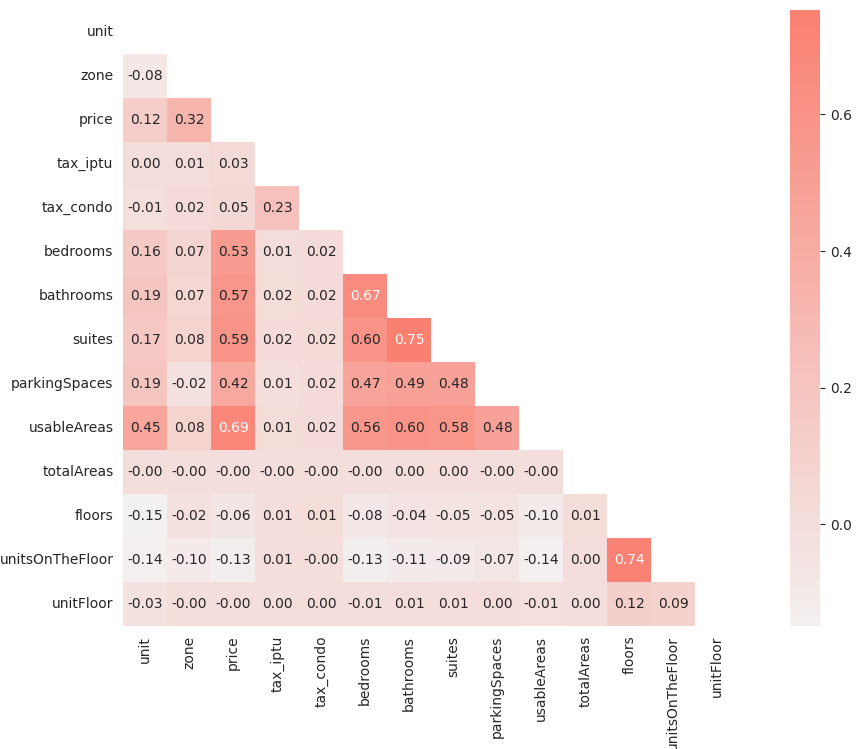

In [114]:

cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacion)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

#### Histograma

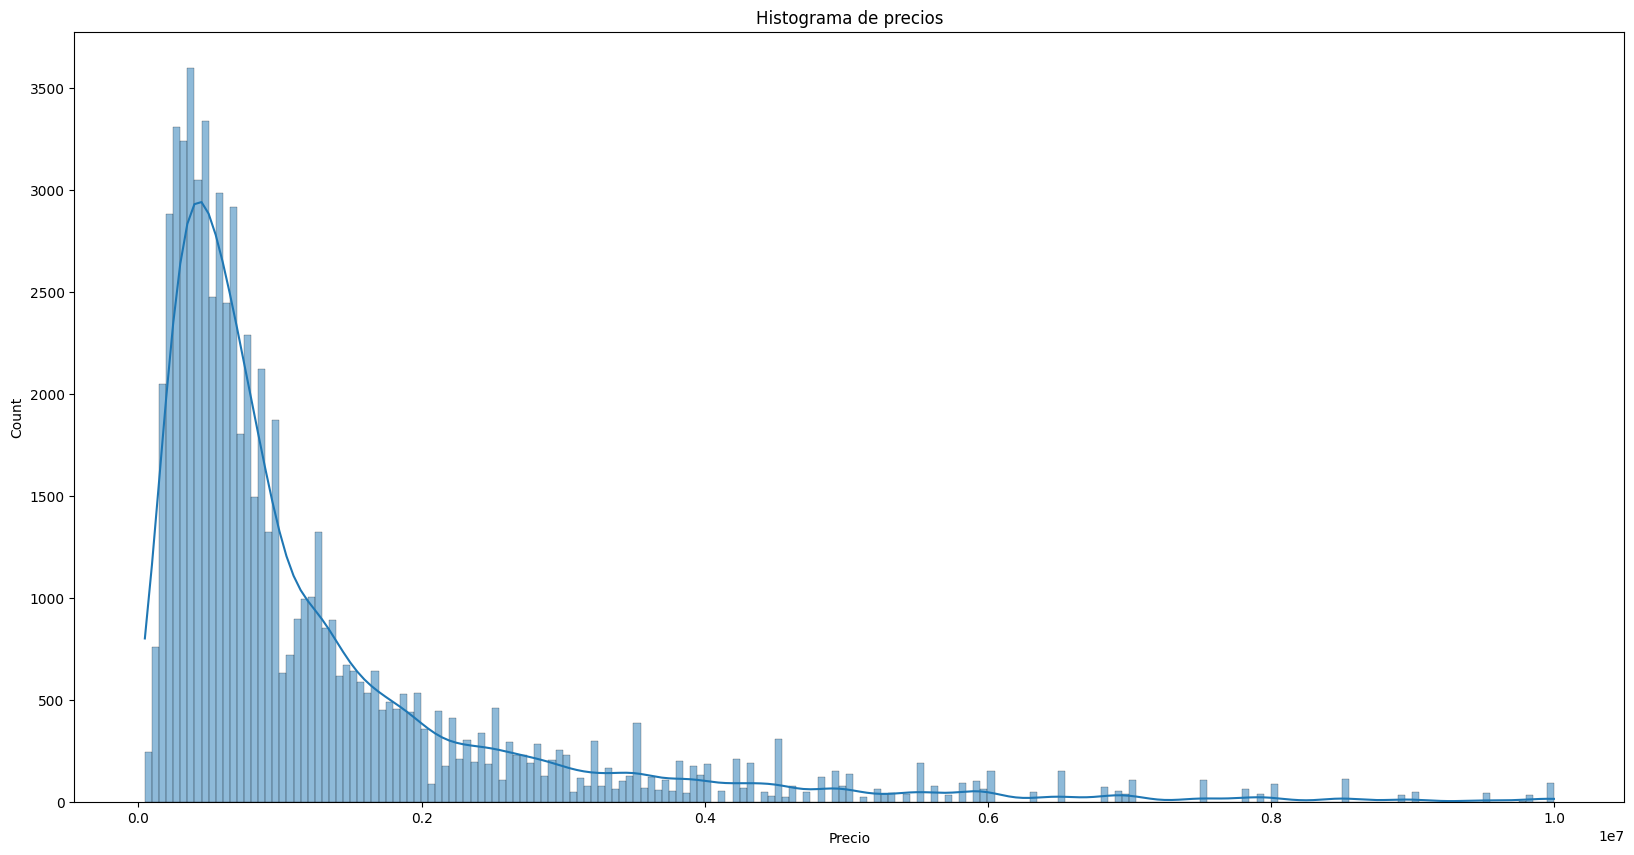

In [115]:
ax = sns.histplot(data=datos_inmuebles, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

Es un distrinucion asimetrica, en la cual los precios se mantienen de un solo lado. La mayoria de los inmuebles son de bajo, ya que se encuentran mas cercano al 0

Mi modelo con esta distribucion no va a ser capaz de predecir correctamente el precio para inmuebles de alto valor, porque la gran mayoria de datos se encuentran en el rango de bajo valor.

No estan distribuidos de forma simetrica

**Para generar modelos de regresion lineal se necesita de distribuciones simetricas en la variable dependiente (la que vamos a predecir), es decir, la variable precio.**

#### Generando una Distribucion Simetrica
Para ello debo transformar las variables;
Uso FunctionTransformer de Sklearn que transforma todos mis datos numericos a su funcion logaritmica, generando una distribucion simetrica

In [116]:
transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados = transformer.transform(datos_inmuebles.select_dtypes(exclude=['object']))

f:\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Alli ya me transformo a una distribucion simetrica. 'datos_transformados' NO ES UN DF

Debido a este mensaje "UserWarning: X has feature names, but FunctionTransformer was fitted without feature names warnings.warn" el nombre de las columnas no se guardara, porque no acepta dicha transformacion valores y columnas de tipo 'objetc'

Ahora, como las columnas son de tipo 'object' en 'datos_inmuebles', en datos_transformados no me las puede guardar como object, se guardan como int.

Por lo que en una variable llamanda "columnas_datos_tranformados" me voy a guardar el nombre de las columnas de 'datos_inmuebles'

Luego voy a concatenar el nombre de las "columnas_datos_tranformados" con "datos_trasformados" el cual convertire en DF para que se asignen

In [117]:
columnas_datos_tranformados = datos_inmuebles.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([datos_inmuebles.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
df_transformado.head() # los valores de las columnas estan trasnformados a su funcion logaritmica

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,1.098612,1.098612,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,0.000000,1.098612,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,1.098612,1.098612,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,0.000000,1.098612,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,1.098612,1.098612,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


In [118]:
print(columnas_datos_tranformados)

Index(['unit', 'zone', 'price', 'tax_iptu', 'tax_condo', 'bedrooms',
       'bathrooms', 'suites', 'parkingSpaces', 'usableAreas', 'totalAreas',
       'floors', 'unitsOnTheFloor', 'unitFloor'],
      dtype='object')


### Correlacion - Transformacion Logaritmica

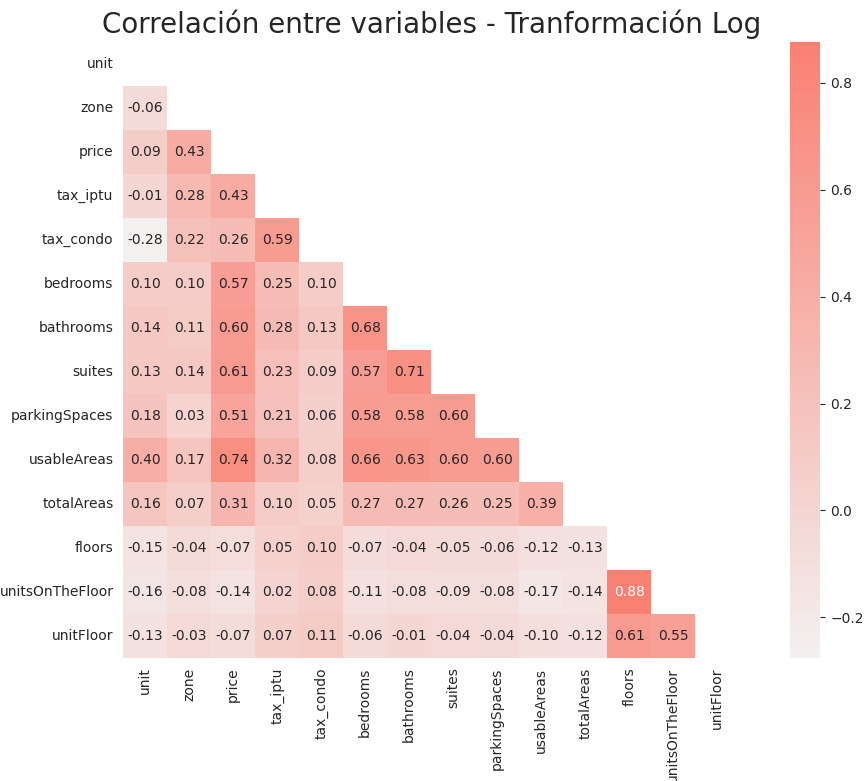

In [119]:
# despues de la transformación
correlacion_transformada = df_transformado.corr()
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

Veo la correlacion nuevamente para ver si genere erroneamente una multicolinealidad

#### Histograma 

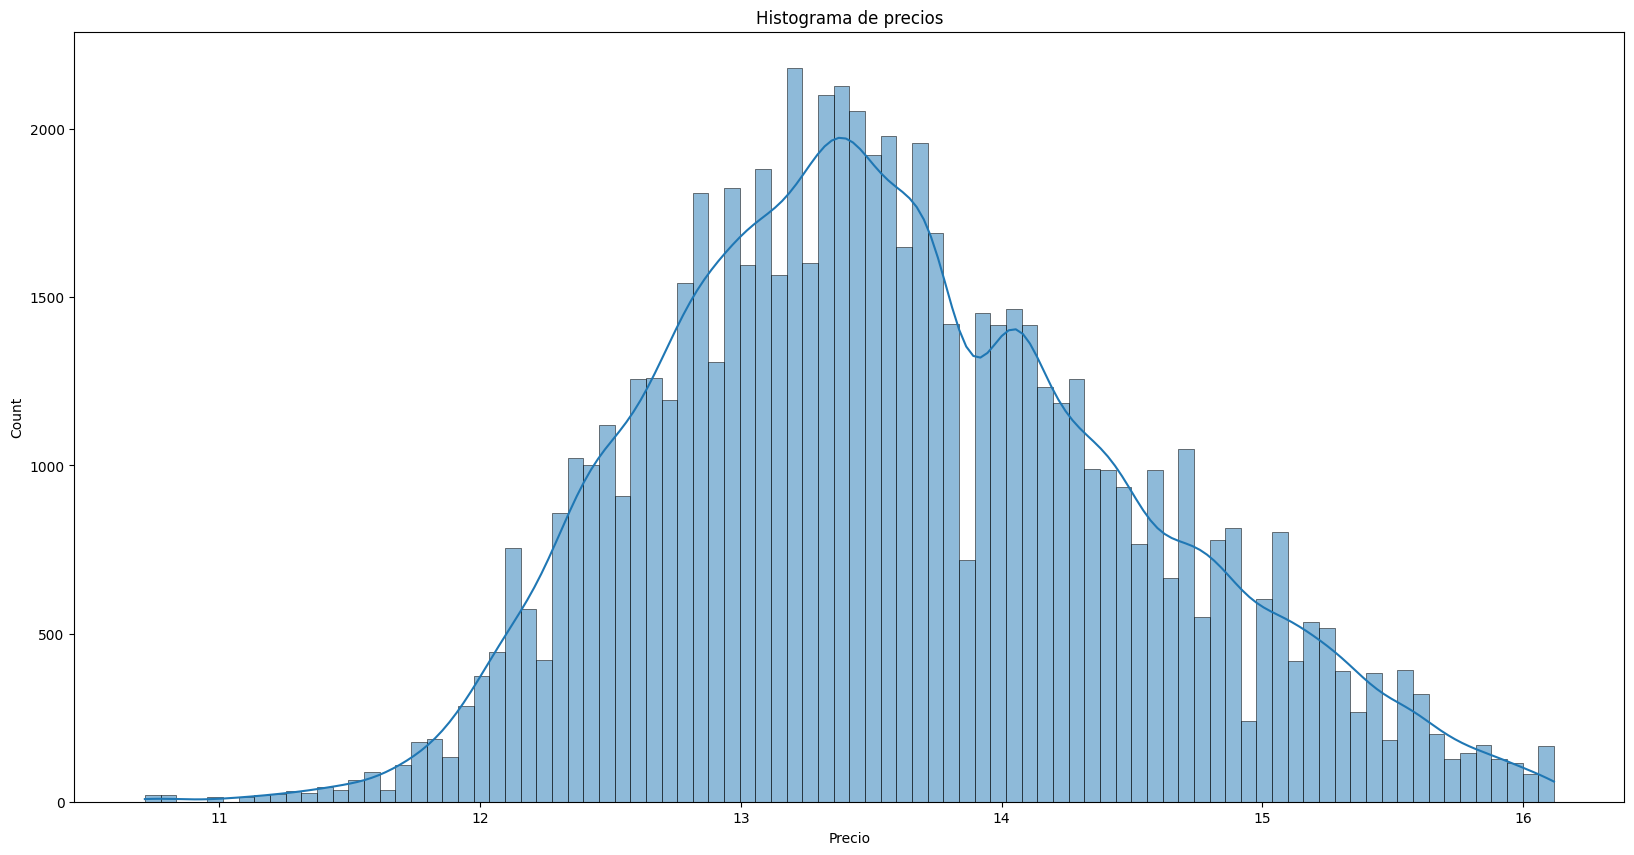

In [120]:
#después (distribución simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de precios')
ax.set_xlabel('Precio');

Distribucion Simetrica lograda

## Division de los Datos

In [121]:
df_transformado.head(3)

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,1.098612,1.098612,10.714440,0.0,5.017280,0.000000,0.000000,0.0,0.693147,4.143135,4.143135,0.0,0.0,0.0
1,0.000000,1.098612,10.714440,0.0,4.795791,1.098612,0.693147,0.0,0.693147,3.806662,0.000000,0.0,0.0,0.0
2,1.098612,1.098612,10.819798,0.0,4.615121,0.000000,0.000000,0.0,0.000000,4.890349,4.890349,0.0,0.0,0.0


Divido el DF

In [122]:
#variables independientes
x = df_transformado.drop('price', axis=1) # Son todas las variables o columnas, excepto la variable a dependiente (Y), es decir, 'price'

#variable dependiente
y = df_transformado['price'] # Es unicamente la variable dependiente (Y). Mi variable a predecir

Division en conjunto de entrenaniento (train) y de prueba (test);

- Los datos train son los que le voy a enseñar al modelo para que aprenda
- Los datos test son para evaluar el rendimiento del modelo entrenado

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

- **x_test** e **y_test** no se lo vamos a enseñar al modelo. 30% de los datos

- **x_train** e **y_train** se lo vamos a enseñar al modelo, para que pueda aprender. 70% de los datos

## Regresion Lineal

Es una técnica estadística que se utiliza para modelar la relación entre una variable independiente (X) y una variable dependiente (Y).

Su **objetivo** es encontrar la mejor línea recta que describa la relación entre estas dos variables. Esta línea se conoce como la "línea de regresión"

Si la linea de regresion para relativamente cerca de los puntos, significa que el modelo consiguio predecir correctamente el o los valores

*Caracteristicas*;

Se va a tener una variable a predecir y otras que ayudan a predecir;

En este caso; "price" es mi variable (dependiente) a predecir, siempre la variable a predecir es mi 'Y'. Las variables independientes que me ayudan a predecir son mi 'X'

- Lo ideal es tener una distribucion simetrica de las variables


In [124]:
#Inicializando el modelo
lr = LinearRegression()

In [125]:
#Entrenamiento
lr.fit(x_train, y_train) # fit para entrenar el modelo

LinearRegression()

El modelo 'lr' de regresion lineal ya aprendio. Ahora podemos empezar a predecir, pero primero hay que cerciorarse si el modelo aprendio correctamente;

In [126]:
#Prueba con datos test
prediccion_lr = lr.predict(x_test) # x_test es todo el df menos 'price'

En la prueba, el modelo intentara predecir con datos que nunca vio (x_test) pero que yo ya conozco, con el objetivo de saber si el modelo de regresion aprendio correctamente.

In [127]:
#Resultados de la predicción
prediccion_lr

array([13.53226076, 12.6824845 , 12.84035188, ..., 13.06870296,
       12.37427185, 14.55232384])

Los precios predichos estan en funcion logaritmica, y no es el precio 'real', ya que necesitaba la funcion logaritmica para tener una distribucion simetrica; El siguiente paso es pasarlos a funcion exponencial para tener los valores originales.

In [128]:
# Transformación exponencial
np.expm1(13.25768024) # tomo una muestra de los datos arrodajos por el modelo y le aplico la exponencial.

572448.7513552749

Entonces el valor pronosticado para el primer indice arrodajo por el modelo es de 572.448 USD

**Pero como se si el valor arrojado por el modelo es correcto?** 

Debido a las metricas. El cual sera mi siguiente paso a establecer; 
- Usare metricas como R-Cuadrado y MSE

In [130]:
# Metrica - R_Cuadrado
r2_lr = r2_score(y_test, prediccion_lr) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
r2_lr

0.715668612850146

In [132]:
# Metrica - MSE
mse_lr = mean_squared_error (y_test, prediccion_lr) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
mse_lr

0.23278699474642212

Tanto el R_Cuadrado como MSE me dan valores relativamente aceptables, aunque no optimos, se puede optimizar el modelo.

## Arbol de Decisión

Es un algoritmo de aprendizaje supervisado, que se utiliza tanto para tareas de clasificación como de regresión. Tiene una estructura de árbol jerárquica, que consta de un **nodo raíz** y **nodos hoja** 
- El nodo raiz no tiene ramas entrantes
- Los nodos hoja representan todos los resultados posibles dentro del conjunto de datos

Cada pregunta te lleva a una respuesta diferente (a un nodo diferente). Tiene una estructura de árbol con una pregunta en el inicio y posibles respuestas en las hojas. 

El objetivo es predecir un valor numérico o una categoría basada en las características de entrada.



Hay que evitar el  overfitting (sobreajuste) en donde el modelo se ajusta demasiado bien a los datos de entrenamiento y pierde capacidad de generalización a nuevos datos no vistos, es decir, cuando entren nuevos datos, el modelo no sabra que camino tomar.

In [134]:
# Inicializando el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5) # En el arbol de decision de regresion (dtr) se le pasan parametros;

Parametros; 
- random_state=42: Establece una semilla aleatoria para la inicialización de números aleatorios. Aseguramos que los resultados sean consistentes
- max_depth=5: Establece la profundidad máxima del árbol de decisión. Especifica cuántos niveles de división se permiten en el árbol, desde el nodo raíz hasta las hojas

In [135]:
# Entrenamiento
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [136]:
# Prueba con datos test
prediccion_dtr = dtr.predict(x_test)

In [137]:
# Resultados de la predicción
prediccion_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

In [138]:
# Transformación exponencial
np.expm1(13.55136531) 

767861.0011640199

Paso a las metricas para comprabrar su precision;

f:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


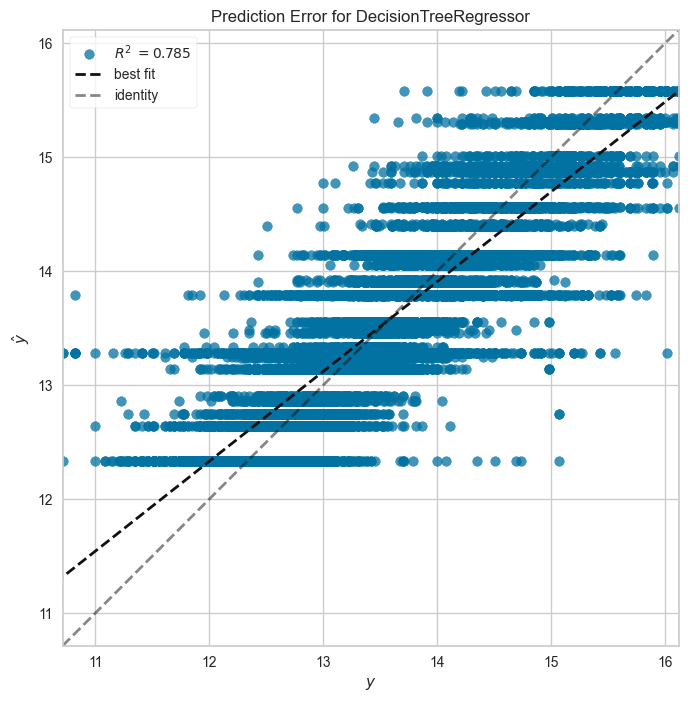

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [143]:
# Metrica - Prediccion_Error
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(dtr)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

Interpretacion;
- La linea gris es la linea de 45 grados que recorre la mitad de los datos
- La linea negra es la linea de la prediccion del modelo, cuanto mas cerca de la linea de 45 grados (linea gris), mas preciso sera el modelo

Inclusive te da el valor de R-Cuadro, el cual se ve arriba que es de 0.75 de acurracy

In [144]:
# Metrica - R_Cuadrado
r2_dtr = r2_score(y_test, prediccion_dtr) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
r2_dtr

0.7846916218477398

In [145]:
# Metrica - MSE
mse_dtr = mean_squared_error (y_test, prediccion_dtr) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
mse_dtr

0.17627667067011188

## Random Forest

Es un algoritmo de aprendizaje supervisado, que se utiliza tanto para tareas de clasificación como de regresión. Se trata de un conjunto de árboles de decisión, con varios **nodos raiz**.

Cada arbol intentara llegar al mismo resultado, el rendimiento esta en que, suponiendo que existen 5 arboles de decision todos con un resultado entre 0.1 y 0.5, se hara un promedio de esos resultados, generando uno unico siendo este el mas representativo de prediccion

In [147]:
# Inicializando el modelo
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10) #En el RandomForest se le pasan parametros;

Parametros;
- random_state=42: Establece una semilla aleatoria para la inicialización de números aleatorios. Aseguramos que los resultados sean consistentes
- max_depth=5: Establece la profundidad máxima del árbol de decisión. Especifica cuántos niveles de división se permiten en el árbol, desde el nodo raíz hasta las hojas
- n_estimators=10: Especifica el número de árboles que se van a construir

In [148]:
# Entrenamiento 
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [149]:
# Prueba con datos test
prediccion_rf = rf.predict(x_test)

In [150]:
# Resultados de la predicción
prediccion_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

In [151]:
# Transformación exponencial
np.expm1(13.53707348) 

756964.8960866113

Paso a las metricas para comprabrar su precision;

f:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


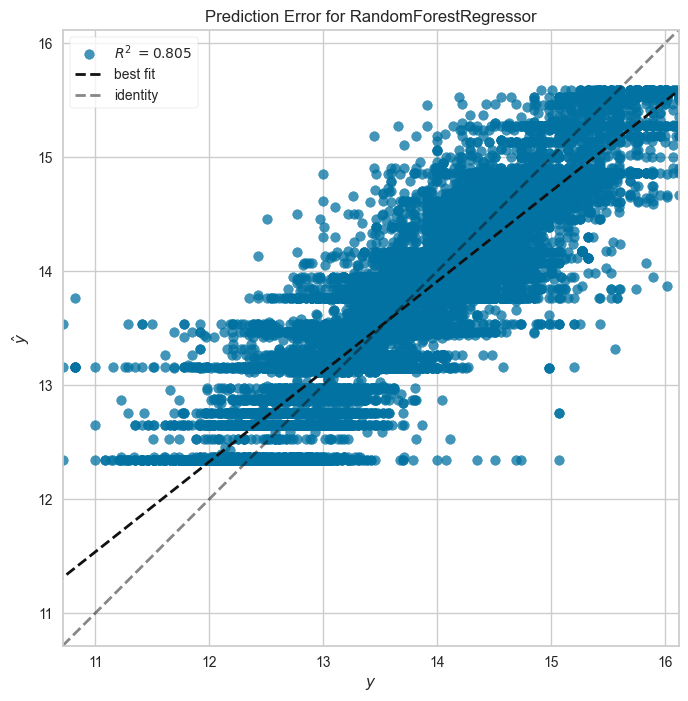

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [153]:
# Metrica - Prediccion_Error
fig, ax = plt.subplots(figsize=(8, 8))
pev = PredictionError(rf)
pev.fit(x_train, y_train)
pev.score(x_test, y_test)
pev.poof()

Interpretacion;

- La linea gris es la linea de 45 grados que recorre la mitad de los datos
- La linea negra es la linea de la prediccion del modelo, cuanto mas cerca de la linea de 45 grados (linea gris), mas preciso sera el modelo


In [154]:
# Metrica - R_Cuadrado
r2_rf = r2_score(y_test, prediccion_rf) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
r2_rf

0.8052758448480106

In [155]:
# Metrica - MSE
mse_rf = mean_squared_error (y_test, prediccion_rf) # y_text es el df unicamente con 'price' y tambien le paso la prediccion_lr que seria x_test, que es todo el df menos 'price'
mse_rf

0.1594240134258456

# Tecnicas de Optimizacion

*Accuracy de los Modelos*
- Regresion Lineal: **0.715668612850146**
- Arbol de Decision: **0.7846916218477398**
- Random Forest: **0.8052758448480106**

Existen varias tecnicas de optimizacion. Usare 2;

1. *Cross Validation (Validación Cruzada)*

- Es una técnica para evaluar el rendimiento de los modelos. Consiste en particionar los datos en subconjuntos (partes), donde un subconjunto se usa para entrenamiento y otro subconjunto se usa para probar y evaluar el rendimiento del modelo

- **K-fold**: El conjunto de entrenamiento se divide aleatoriamente en K subconjuntos de aproximadamente el mismo tamaño, luego se realizan K iteraciones, donde los subconjuntos K-1 son para entrenamiento y 1 para validación.

- El rendimiento calculado por validación cruzada k-fold es el promedio de todos los valores calculados en cada iteración
- **Proceso**; Se mezcla aleatoriamente los datos, se escoge el valor de k y se divide el set de datos en k partiones
- Criollo --> Se divide el set de datos completo en k numeros (particiones) y luego el modelo se entrena y valida con las particiones
- E= Con k = 3, el set de datos se divine en bloques de 3. Primero se entrena al modelo con el bloque 2 y 3, y se valida con el 1. Luego se entrena al modelo con el bloque 1 y 3, y se valida con el 2, por ultimo, se entrena al modelo con el bloque 1 y 2, y se valida con el 3. Cada entrenamiento y validacion dara un desempeño (accuracy), tendremos tanto desempeño de entrenamiento y desempeño de validacion. Finalmente, se hace un promedio del desempeño de, en este caso, los 3 de validacion y los 3 de entrenamiento, dejando unicamente un desempeño final, que seria el promedio de los 3 desempeños.

2) *Randomized Parameter Optimization (Optimización Aleatoria de Parámetros)*
- Busca la mejor combinacion de parametros con sus distintos valores del modelo para que sea lo mas eficientemente posible.

## Optimizando el Arbol de Decision

### Cross Validation

In [157]:
# Definiendo el K - número de subconjuntos 
cv = KFold(n_splits = 5, shuffle=True) # inicializo k=5, cv me va a separar la base en 5 subconjuntos

Los parametros que se le pasan a cross_val_score;
- El arbol de decision (dtr)
- x_train (todo menos el precio)
- y_train (solo el precio)
- scoring es el R_Cuadrado
- cv es el K=5

In [160]:
# Cross Validation
accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = x_train, # Esta X debe ser mayuscula si o si
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv) # cantidad de divisiones que va a separar x_train e y_train
print('Accuracy promedio de r2: {}'.format(round(accuracy_cross_val_r2.mean(), 3))) # division del dataset en 3 pedazos

Accuracy promedio de r2: 0.782


Me dio un accurary de 0.78, el cual no vario del primer accuracy de arbol de decision

### Randomized Parameter Optimization 

#### Random Search Validation

In [162]:
# Selección de hiperparametros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'], # Utilizo estos criterios para disminuir el error
    'max_depth': [6, 8, 10, 12, 14, 16], #Profundidad del arbol
    'min_samples_leaf': [6, 8, 10], # Cantidad de hojas
    'min_samples_split': [8, 10, 12, 14, 16], # Cantidad de tomas de decision
    'max_features': ['sqrt', 'log2', 'auto'], # Precision del modelo
}

In [163]:
#Inicializo RandomizedSearchCV
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5, 
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [165]:
# Entrenamiento
randomcv_dtr = random_cv_dt.fit(x_train, y_train)

f:\Python\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "f:\Python\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\Python\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "f:\Python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "f:\Python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constrain

In [166]:
# Observacion de resultados
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.710087,0.204418,0.002641,0.000537,14,6,log2,6,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.745900,0.743536,0.750654,0.748729,0.745128,0.746790,0.002563,4
1,0.026334,0.002631,0.002194,0.000398,14,10,log2,6,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.750705,0.737200,0.749922,0.746425,0.750328,0.746916,0.005093,3
2,9.496914,0.962219,0.002178,0.000394,12,6,sqrt,10,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.811182,0.791527,0.821165,0.825180,0.817196,0.813250,0.011804,1
3,0.003593,0.000492,0.000000,0.000000,12,8,auto,8,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.028361,0.001499,0.002194,0.000399,8,6,sqrt,8,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 6...",0.794811,0.767683,0.789501,0.792142,0.781453,0.785118,0.009797,2


In [167]:
#la mejor combinación de parametros
randomcv_dtr.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error'}

In [168]:
#el mejor score
randomcv_dtr.best_score_

0.8132497601925126

Ahora hago la con prueba;

### Random Search Test

In [174]:
# Hago el arbol de decision con los best_params
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 12,
 min_samples_leaf = 6,
 max_features = 'sqrt',
 max_depth = 10,
 criterion= 'absolute_error')

In [175]:
# Entrenamiento
dtr_optimizado.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=12)

In [176]:
# Prediccion con los datos de prueba
prediccion_dtr_optimizado = dtr_optimizado.predict(x_test)

In [177]:
# Metrica - R_Cuadrado
r2_score(y_test, prediccion_dtr_optimizado)

0.8256845837495169

0.784 fue el primer coeficiente de determinacion,gracias a la optimizacion ahora es de 0.825

## Optimizando Random Forest

### Cross Validation

Los parametros que se le pasan a cross_val_score;
- El Bosque de Arboles (rf)
- x_train (todo menos el precio)
- y_train (solo el precio)
- scoring es el R_Cuadrado
- cv es el K=5

In [178]:
# Cross Validation
accuracyRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = x_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracyRF_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.797


### Random Search Validation

In [179]:
# Selección de hiperparametros
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [180]:
#Inicializo RandomizedSearchCV
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [181]:
# Entrenamiento
rf_randomcv = random_cv_rf.fit(x_train, y_train)

In [182]:
# Observacion de Resultados
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,24.357272,0.333844,0.354452,0.008359,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.898034,0.891326,0.895139,0.891934,0.899596,0.895206,0.003257,2
1,24.521034,0.108686,0.367617,0.008570,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.898066,0.891303,0.895196,0.891941,0.899683,0.895238,0.003290,1
2,18.240826,0.179195,0.265291,0.007979,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.898076,0.891247,0.895029,0.891569,0.899440,0.895072,0.003317,3
3,24.088391,0.348801,0.316360,0.016876,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.897800,0.890947,0.894790,0.891499,0.899198,0.894847,0.003289,4
4,17.356807,0.983634,0.223395,0.024007,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.897725,0.890861,0.894682,0.891076,0.898998,0.894668,0.003331,5


In [183]:
#la mejor combinación de parametros
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [184]:
#el mejor score
rf_randomcv.best_score_

0.895237778119025

Ahora hago la con prueba;

### Random Search Test

In [185]:
# Hago el randomforest con los best_params
rf_optimizado2 = RandomForestRegressor(random_state=42, 
                                       max_depth=30, 
                                       n_estimators=200,
                                      min_samples_leaf=3, 
                                      min_samples_split=8)

In [186]:
# Entrenamiento
rf_optimizado2.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [187]:
# Prediccion con los datos de prueba
prediccion_rf_optimizado2 = rf_optimizado2.predict(x_test)

In [188]:
#Metrica R_Cuadrado
r2_score(y_test, prediccion_rf_optimizado2)

0.8950264526911962

0.805 fue el primer coeficiente de determinacion,gracias a la optimizacion ahora es de 0.895

# Seleccion del Mejor Modelo

In [190]:
# Tabla de resultados
print('Random Search')
print("="*30)
print("Arbol de Decisión: %f" % r2_score(y_test, prediccion_dtr_optimizado))
print("Random Forest: %f" % r2_score(y_test, prediccion_rf_optimizado2)) # Este es el mejor modelo
print("*"*30)

print("Cross Validation")
print("="*30)
print("Arbol de Decisión: %f" % round(accuracy_cross_val_r2.mean(), 3))
print("Random Forest: %f" % round(accuracyRF_cross_val_r2.mean(), 3))

Random Search
Arbol de Decisión: 0.825685
Random Forest: 0.895026
******************************
Cross Validation
Arbol de Decisión: 0.782000
Random Forest: 0.797000


In [192]:
#Probando el mejor modelo 
cliente = pd.DataFrame({'unit':[0],'zone':[1.098],'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0]})
cliente

,unit,zone,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,0,1.098,4.6,5.45,2,1,1,1,4,4.68,0,0,0


In [193]:
#Verificando el resultado
prediccion_cliente = rf_optimizado2.predict(cliente)
np.expm1(prediccion_cliente) # Paso de funcion logaritmica a exponencial

array([327924.91062069])

El precio para la propiedad dados esos parametros con una precision de 0.895 fue de 327.924 USD